In [1]:
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [5]:
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [7]:
model = Sequential ([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Flatten(),
    Dense(128, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

C:\Users\veera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history=model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 139ms/step - accuracy: 0.6927 - loss: 0.5756 - val_accuracy: 0.8492 - val_loss: 0.3441
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 131ms/step - accuracy: 0.9562 - loss: 0.1374 - val_accuracy: 0.8558 - val_loss: 0.3621
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - accuracy: 0.9976 - loss: 0.0203 - val_accuracy: 0.8614 - val_loss: 0.3961
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 130ms/step - accuracy: 0.9999 - loss: 0.0038 - val_accuracy: 0.8652 - val_loss: 0.4283
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8654 - val_loss: 0.4481


In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 180:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8631 - loss: 0.4504
Test Accuracy: 155.79%


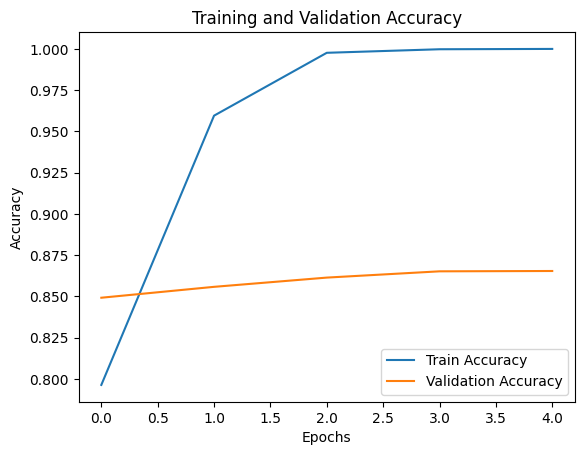

In [15]:
#plot accuracy, graph
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

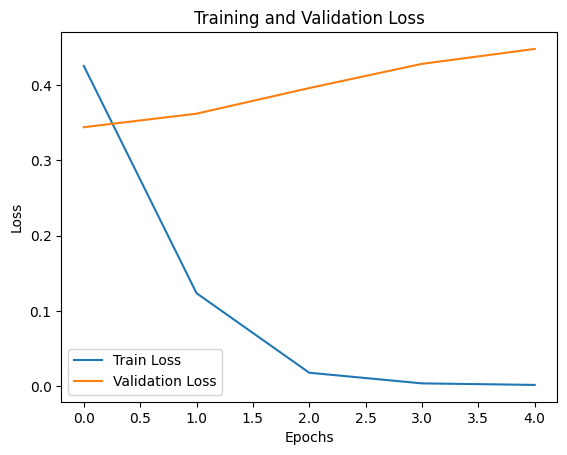

In [16]:
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()